# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

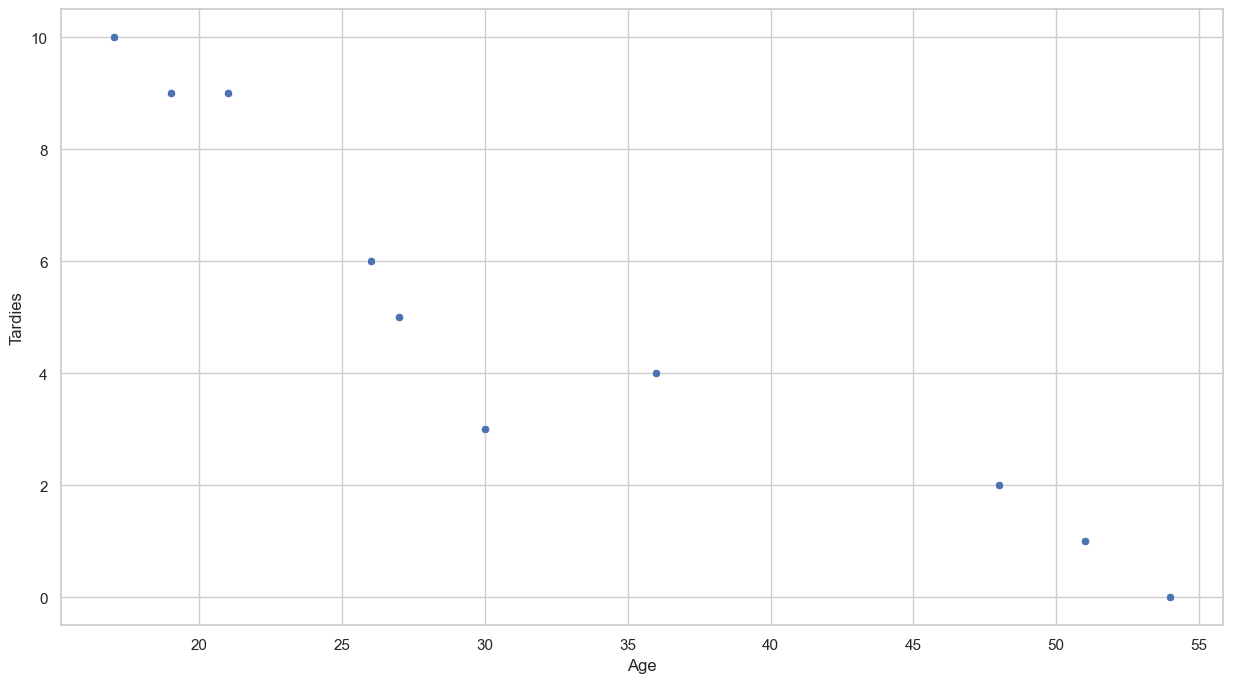

In [4]:
sns.scatterplot(y = student_data.Tardies, x = student_data.Age);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
'''
It seems that the younger the students, the more tardies they do.
'''

'\nIt seems that the younger the students, the more tardies they do.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
student_data[['Tardies', 'Age']].cov()

,Tardies,Age
Tardies,12.544444,-45.566667
Age,-45.566667,187.655556


In [8]:
student_data[['Tardies', 'Age']].corr('pearson')

,Tardies,Age
Tardies,1.000000,-0.939163
Age,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
'''
the outcome variable will be 'Age'. I'll be using linear regression.
'''

In [10]:
lr = LinearRegression() # 1. Create an equation that draws a line
X = student_data[["Age"]]
y = student_data.Tardies
lr.fit(X, y) 

LinearRegression()

Plot your regression model on your scatter plot.

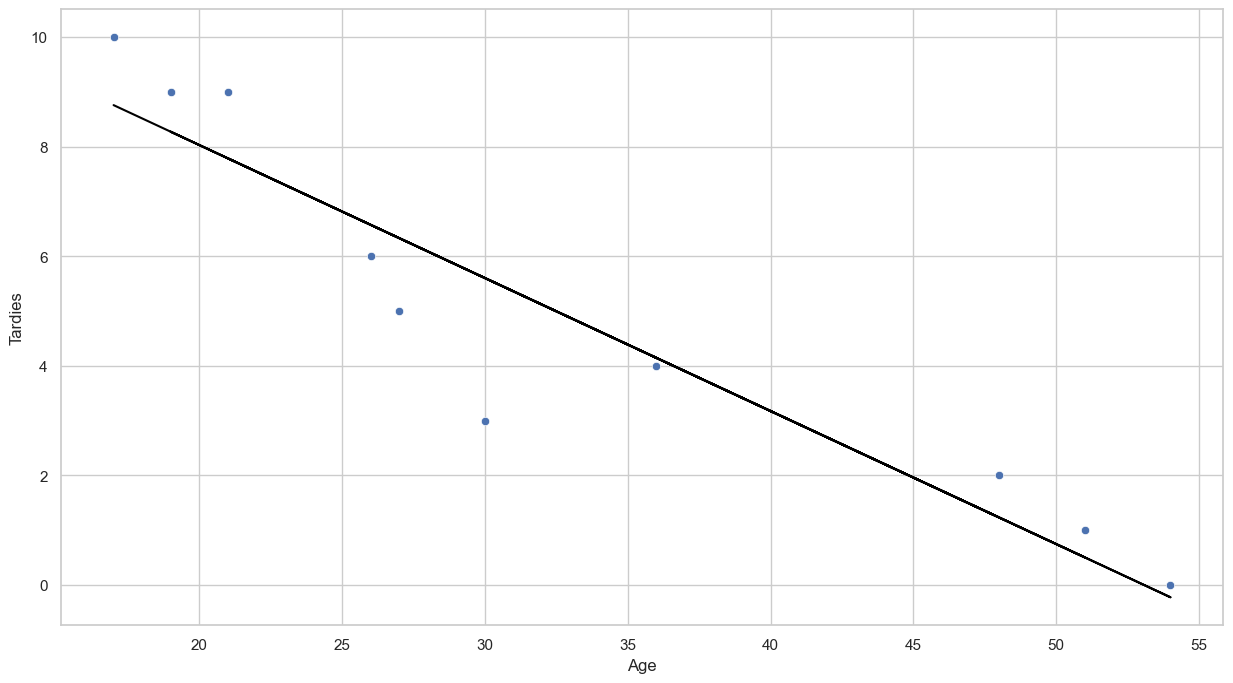

In [13]:
student_data["prediction_through_scikit_learn"] = student_data.Age * lr.coef_[0] + lr.intercept_
sns.scatterplot(y = student_data.Tardies, x = student_data.Age)
plt.plot(student_data.Age, student_data['prediction_through_scikit_learn'], c='black', label="prediction");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [12]:
r2 = metrics.r2_score(student_data.Tardies, student_data["prediction_through_scikit_learn"])
r2

0.8820265558250109

In [ ]:
'''
The model is quite good as the 'Age' outcome works well to predict.
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
vechicles = pd.read_csv('./vehicles.csv')
vechicles.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
1434,BMW,135i Convertible,2008,3.0,6.0,Manual 6-spd,Rear-Wheel Drive,Subcompact Cars,Premium,16.4805,17,26,20,444.35,2000


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
clean_v = vechicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
clean_v.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
from sklearn.model_selection import train_test_split

X = clean_v.drop(columns=['CO2 Emission Grams/Mile'])
y = clean_v['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
import statsmodels.formula.api as smf
result = smf.ols('y ~ X', data = clean_v).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:57:20   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    769.8883     19.392     39.702      0.000     731.880     807.897
X[0]          -0.3206      0.010    -33.060      0.000      -0.340      -0.302
X[1]           1.8788      0.083     22.598      0.000       1.716       2.042
X[2]          19.0529      0.061    311.600      0.000      18.933      19.173
X[3]          -3.0404      0.042    -71.645      0.000      -3.124      -2.957
X[4]           0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [23]:
data = [
    [1, 1],
    [2, 2],
    [4, 4],
    [6, 4],
    [8, 5],
    [9, 7],
    [11, 8],
    [14, 13]
]
data = pd.DataFrame(columns=['X', 'Y'], data=data)
data

,X,Y
0,1,1
1,2,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

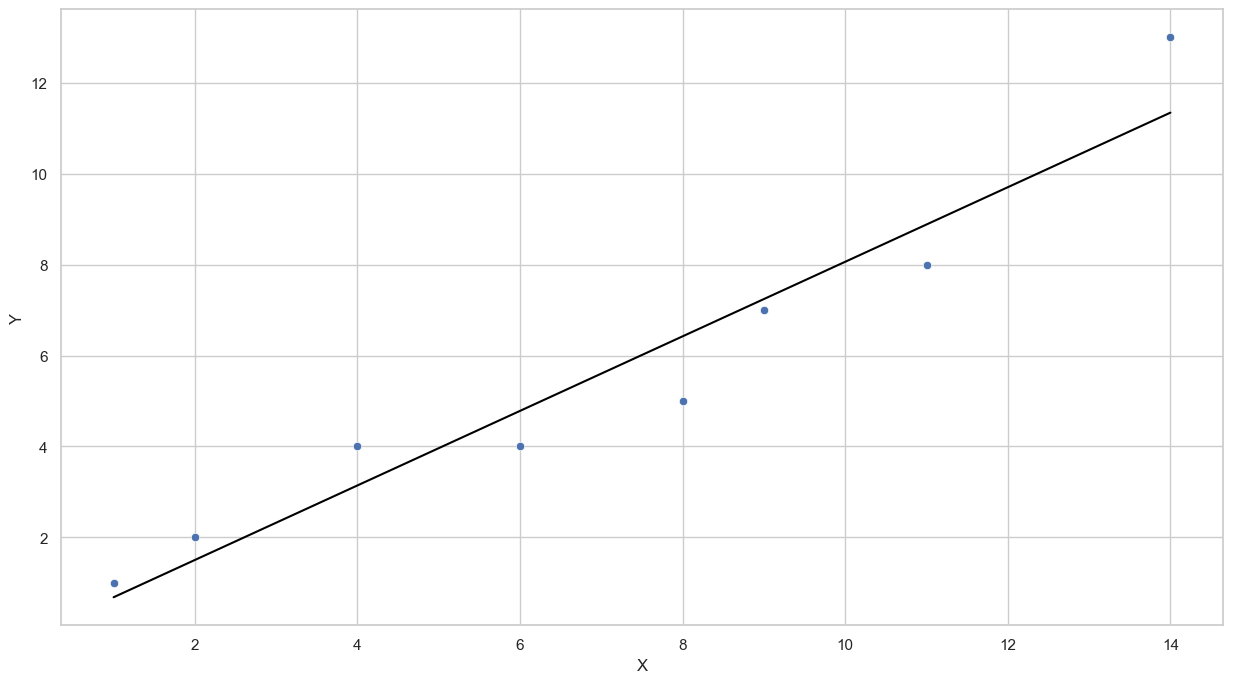

In [27]:
lr = LinearRegression()
X = data[["X"]]
y = data.Y
lr.fit(X, y) 
data["prediction_through_scikit_learn"] = data.X * lr.coef_[0] + lr.intercept_
sns.scatterplot(x='X', y='Y', data=data)
plt.plot(data.X, data['prediction_through_scikit_learn'], c='black', label="prediction");

In [30]:
metrics.r2_score(data.Y, data["prediction_through_scikit_learn"])

0.928388746803069

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
'''From the scatterplot, it seems that the more people invited, the more attends.'''

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

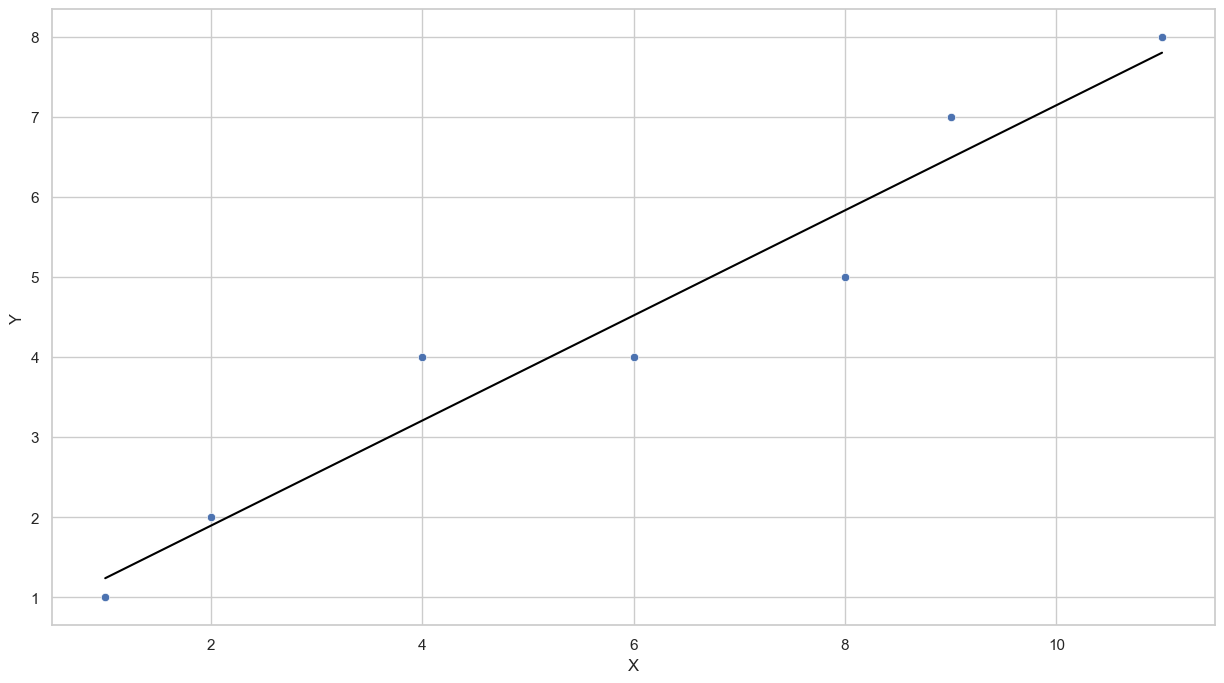

In [31]:
'''The (14, 13) could be an outlier'''
data = data.drop(7)

lr = LinearRegression()
X = data[["X"]]
y = data.Y
lr.fit(X, y) 
data["prediction_through_scikit_learn"] = data.X * lr.coef_[0] + lr.intercept_
sns.scatterplot(x='X', y='Y', data=data)
plt.plot(data.X, data['prediction_through_scikit_learn'], c='black', label="prediction");

In [32]:
metrics.r2_score(data.Y, data["prediction_through_scikit_learn"])

0.9480211598746082

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
'''By removing the possible outlier, the regression model now is more accurate because the r2 score now is higher than the previous.'''